# Most Active Bike-Day Scoping

A bunch of time passed in between my writing the last notebook and this current one, during which I (in addition to slacking off a lot) wrote up the pieces of code assembled therein into a right proper module (`citibike_weeks`), wrote tests for it, wrote some scripts, dumped some data into the data store, and started working on the visualization.

However as I was staring at the big pretty splash of bike-trip paths, I realized that I was missing an opportunity. The CitiBike system is a giant Markov chain, and here I was following a single thread here or there. I could continue to consider the case of a single bike, or I could throw out everything I've done so far and start anew in order to generate a bigger granded cooler visualization, one focusing around the movement of bikes between stations on the busiest day of the year. The new idea was twofold: visualize stations over the course of a day, keeping track of a chosen station's comings and goings; and visualize bike-sets over the course of a day, watching where the bikes that started at one particular station ended up by the end of the day.

Given the choice between keeping the work that I had done and modulating it, and doing a newer bigger awesomer thing, guess what I picked...

Right, first step of that, then. What *is* the most bike-heavy day of the year? I decided that taking 2015 data wouldn't cut it&mdash;let's instead take the busiest day from the first half of 2016 and run with it!

Figuring that out is the purview of this notebook.

To start with, it has to be one of April, May, or June, per [seasonal trends](http://toddwschneider.com/posts/a-tale-of-twenty-two-million-citi-bikes-analyzing-the-nyc-bike-share-system/). So all we have to do is get those three months' datasets, smush them together, index by datetime string fragment, do a value count, and pick a winner!

(some other things come later of course)

In [7]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import io
%matplotlib inline

In [8]:
trip_data = []
r = requests.get('https://s3.amazonaws.com/tripdata/201603-citibike-tripdata.zip')
with zipfile.ZipFile(io.BytesIO(r.content)) as ar:
    trip_data.append(pd.read_csv(ar.open('201603-citibike-tripdata.csv')))
r = requests.get('https://s3.amazonaws.com/tripdata/201604-citibike-tripdata.zip')
with zipfile.ZipFile(io.BytesIO(r.content)) as ar:
    trip_data.append(pd.read_csv(ar.open('201604-citibike-tripdata.csv')))
r = requests.get('https://s3.amazonaws.com/tripdata/201605-citibike-tripdata.zip')
with zipfile.ZipFile(io.BytesIO(r.content)) as ar:
    trip_data.append(pd.read_csv(ar.open('201605-citibike-tripdata.csv')))
r = requests.get('https://s3.amazonaws.com/tripdata/201606-citibike-tripdata.zip')
with zipfile.ZipFile(io.BytesIO(r.content)) as ar:
    trip_data.append(pd.read_csv(ar.open('201606-citibike-tripdata.csv')))
trip_data = pd.concat(trip_data)

In [9]:
trip_data.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [12]:
trip_data['starttime'].map(lambda t: t.split(" ")[0]).value_counts()

6/22/2016    55749
6/15/2016    55049
6/29/2016    54882
6/30/2016    54843
6/14/2016    54813
6/1/2016     54665
6/2/2016     54401
6/17/2016    54236
6/24/2016    54186
6/21/2016    53564
5/25/2016    53439
6/10/2016    53299
6/23/2016    53206
6/9/2016     52905
5/20/2016    52543
5/12/2016    52273
6/20/2016    52247
6/6/2016     52149
5/26/2016    52133
6/7/2016     51812
5/11/2016    51181
5/31/2016    49756
6/28/2016    49593
5/19/2016    49182
6/13/2016    49069
6/18/2016    48901
4/22/2016    48815
5/23/2016    48578
6/27/2016    47023
5/27/2016    46937
             ...  
4/8/2016     30817
5/21/2016    30519
3/1/2016     30509
4/7/2016     30402
4/6/2016     29365
5/15/2016    28661
3/13/2016    27550
3/26/2016    27478
3/21/2016    26414
4/5/2016     26238
3/2/2016     26195
3/3/2016     24061
3/19/2016    24048
4/12/2016    23765
4/10/2016    23229
5/3/2016     22858
3/27/2016    22483
6/5/2016     22397
4/2/2016     21839
3/28/2016    20345
5/6/2016     18860
3/6/2016    

June 22nd wins!

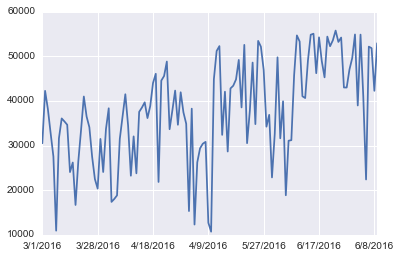

In [13]:
trip_data['starttime'].map(lambda t: t.split(" ")[0]).value_counts().sort_index().plot()

June was pretty easily the most popular month.

In [14]:
indexer = trip_data['starttime'].map(lambda t: t.split(" ")[0] == '6/22/2016')

In [16]:
trip_data[indexer].head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1004842,785,6/22/2016 00:00:11,6/22/2016 00:13:17,334,W 20 St & 7 Ave,40.742388,-73.997262,450,W 49 St & 8 Ave,40.762272,-73.987882,25585,Subscriber,1978.0,1


In [17]:
trip_data[indexer].to_csv("../data/part_2/citibike_trips_on_june_22_2016.csv")